## Datasets Exploration and Visualization

In [2]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import pickle
import re
from PIL import Image
from scipy.io import loadmat
import yaml

In [3]:
with open('../__local__config.yaml', 'r') as f:
        local_config = yaml.load(f)
data_dir = local_config['data_path']
data_dir

'/mnt/data/handpose/'

### Rendered Hand Pose Dataset (Synthetic)

Link to download: https://lmb.informatik.uni-freiburg.de/resources/datasets/RenderedHandposeDataset.en.html

This dataset provides 41258 training and 2728 testing samples. Each sample provides:
- RGB image (320x320 pixels)
- Depth map (320x320 pixels);
- Segmentation masks (320x320 pixels) for the following classes: background, person, three classes for each finger and one for each palm
- 21 Keypoints for each hand with their uv coordinates in the image frame, xyz coordinates in the world frame and an indicator if they are visible
- Intrinsic Camera Matrix K

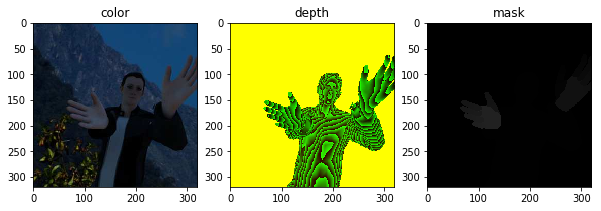

In [9]:
root_dir = data_dir + 'RHD_published_v2/training/'
img_num = 10

arr = ['color','depth','mask']

plt.figure(figsize = [10,5])
for i, name in enumerate(arr):
    
    plt.subplot(1,3,i+1)
    fn = root_dir + name + '/' + str(img_num).zfill(5) + '.png'
    img = Image.open(fn)
    plt.imshow(img)
    plt.title(name)
    
plt.show()

In [10]:
fn_anno = root_dir + 'anno_training.pickle'
df_anno = pickle.load(open(fn_anno, 'rb'))

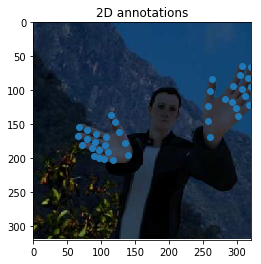

In [11]:
anno_2d = df_anno[img_num]['uv_vis']
anno_2d_xs = [x[0] for x in anno_2d]
anno_2d_ys = [x[1] for x in anno_2d]

fn = root_dir + 'color' + '/' + str(img_num).zfill(5) + '.png'
img = Image.open(fn)
plt.imshow(img)
plt.plot(anno_2d_xs, anno_2d_ys, 'o') 
plt.ylim(0,320)
plt.xlim(0,320)
plt.gca().invert_yaxis()
plt.title('2D annotations')
plt.show()

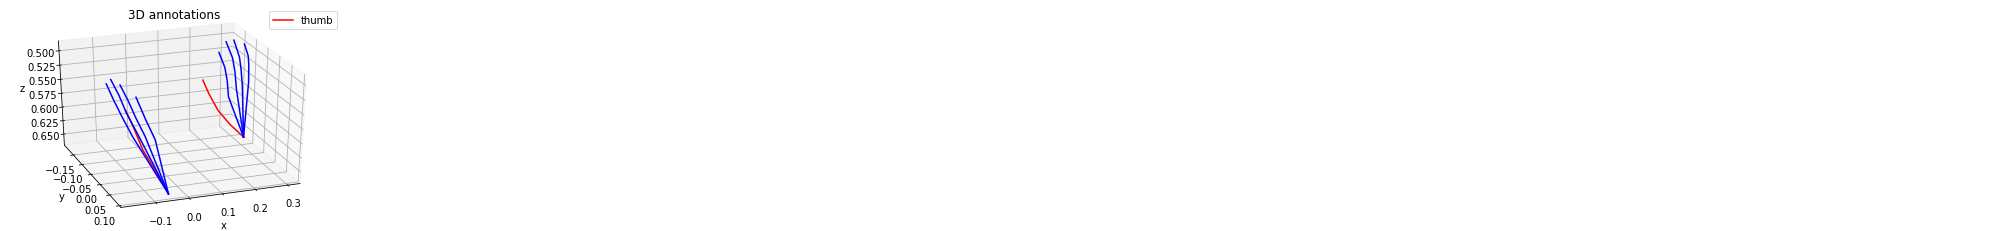

In [12]:
anno_3d = df_anno[img_num]['xyz']
anno_3d_xs = np.array([x[0] for x in anno_3d])
anno_3d_ys = np.array([x[1] for x in anno_3d])
anno_3d_zs = np.array([x[2] for x in anno_3d])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plt.plot(anno_3d_xs[[1,2,3,4,0]], anno_3d_ys[[1,2,3,4,0]], anno_3d_zs[[1,2,3,4,0]], 'r', label='thumb')
plt.plot(anno_3d_xs[[5,6,7,8,0]], anno_3d_ys[[5,6,7,8,0]], anno_3d_zs[[5,6,7,8,0]], 'b')
plt.plot(anno_3d_xs[[9,10,11,12,0]], anno_3d_ys[[9,10,11,12,0]], anno_3d_zs[[9,10,11,12,0]], 'b')
plt.plot(anno_3d_xs[[13,14,15,16,0]], anno_3d_ys[[13,14,15,16,0]], anno_3d_zs[[13,14,15,16,0]], 'b')
plt.plot(anno_3d_xs[[17,18,19,20,0]], anno_3d_ys[[17,18,19,20,0]], anno_3d_zs[[17,18,19,20,0]], 'b')

plt.plot(anno_3d_xs[[22,23,24,25,21]], anno_3d_ys[[22,23,24,25,21]], anno_3d_zs[[22,23,24,25,21]], 'r')
plt.plot(anno_3d_xs[[26,27,28,29,21]], anno_3d_ys[[26,27,28,29,21]], anno_3d_zs[[26,27,28,29,21]], 'b')
plt.plot(anno_3d_xs[[30,31,32,33,21]], anno_3d_ys[[30,31,32,33,21]], anno_3d_zs[[30,31,32,33,21]], 'b')
plt.plot(anno_3d_xs[[34,35,36,37,21]], anno_3d_ys[[34,35,36,37,21]], anno_3d_zs[[34,35,36,37,21]], 'b')
plt.plot(anno_3d_xs[[38,39,40,41,21]], anno_3d_ys[[38,39,40,41,21]], anno_3d_zs[[38,39,40,41,21]], 'b')

plt.title('3D annotations')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
ax.view_init(330,110)
plt.show()

### SynthHands (Synthetic)

Link to download: https://handtracker.mpi-inf.mpg.de/projects/OccludedHands/SynthHands.htm

There are 63,530 frames of real hand motions. The following data is provided:

- Depth: rendered using Unity (mimicking Intel RealSense SR300 @640x480 px), augmented with real background
- Color on Depth: rendered using Unity (mimicking Intel RealSense SR300 @640x480 px), augmented with real background
- Color: rendered using Unity (mimicking Intel RealSense SR300 @640x480 px), chroma-keyed background
- Annotation: full 3D positions for 21 keypoints of the hand
- Camera Calibration: for mapping the 3D positions onto the image plane and mapping between coordinate systems

In [4]:
root_dir1 = data_dir + 'SynthHands_Release/female_noobject/seq01/cam01/01/'
root_dir2 = data_dir + 'SynthHands_Release/female_object/seq01/cam01/01/'
arr = ['color','color_on_depth','depth']

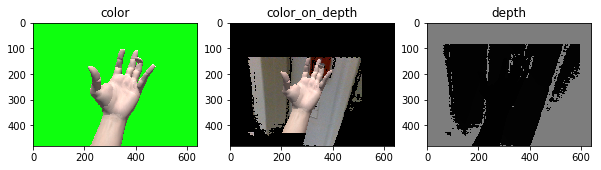

In [5]:
img_num = 0
plt.figure(figsize = [10,5])

for i, name in enumerate(arr):
    plt.subplot(1,3,i+1)
    fn = root_dir1 + str(img_num).zfill(8) + '_' + name + '.png'
    img = cv2.cvtColor(cv2.imread(fn), cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(name)
    
plt.show()

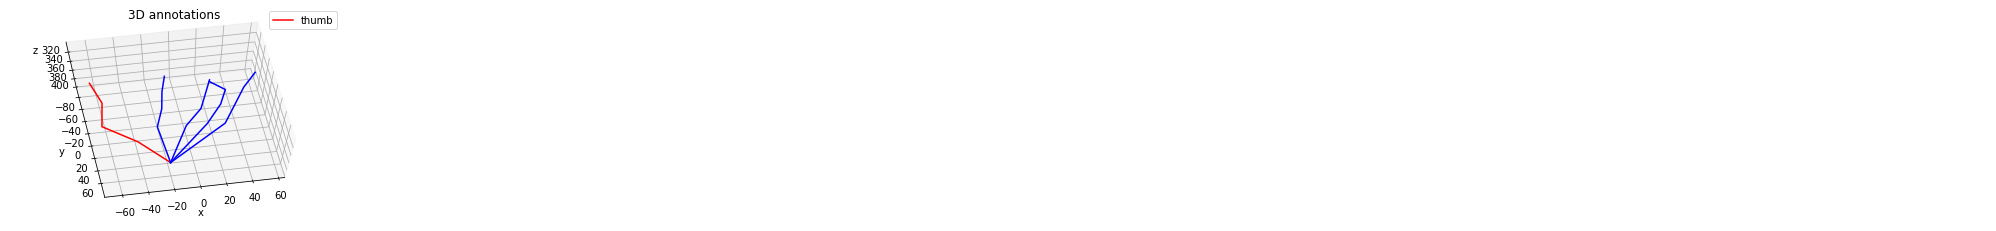

In [6]:
fn_anno_3d = root_dir1 + str(img_num).zfill(8) + '_joint_pos.txt'
anno_3d = np.loadtxt(fn_anno_3d, delimiter=',')
anno_3d = np.reshape(anno_3d, (21,3))

anno_3d_xs = anno_3d[:,0]
anno_3d_ys = anno_3d[:,1]
anno_3d_zs = anno_3d[:,2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.plot(anno_3d_xs[:5], anno_3d_ys[:5], anno_3d_zs[:5], 'r', label='thumb')
plt.plot(anno_3d_xs[[0,5,6,7,8]], anno_3d_ys[[0,5,6,7,8]], anno_3d_zs[[0,5,6,7,8]], 'b')
plt.plot(anno_3d_xs[[0,9,10,11,12]], anno_3d_ys[[0,9,10,11,12]], anno_3d_zs[[0,9,10,11,12]], 'b')
plt.plot(anno_3d_xs[[0,13,14,15,16]], anno_3d_ys[[0,13,14,15,16]], anno_3d_zs[[0,13,14,15,16]], 'b')
plt.plot(anno_3d_xs[[0,17,18,19,20]], anno_3d_ys[[0,17,18,19,20]], anno_3d_zs[[0,17,18,19,20]], 'b')

plt.title('3D annotations')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
ax.view_init(290,100)
plt.show()

In [14]:
# projecting 3D coordintated onto color image plane
color_intrisics_matrix = np.array([[617.173, 0, 315.453],
                           [0, 617.173, 242.259],
                           [0, 0, 1]])

color_extrisics_matrix = np.array([[1, 0, 0, 24.7],
                                  [0, 1, 0, -0.0471401],
                                  [0, 0, 1, 3.72045]])

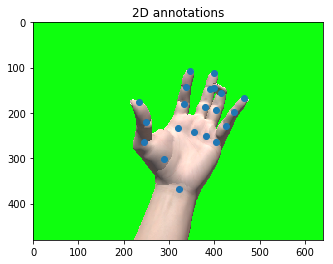

In [15]:
step1 = np.matmul(color_extrisics_matrix, np.hstack((anno_3d, np.ones((anno_3d.shape[0],1)))).T)
step2 = np.matmul(color_intrisics_matrix, step1)
anno_2d = step2.T
anno_2d = anno_2d[:,:2]/np.reshape(anno_2d[:,2], (anno_2d.shape[0],1))

anno_2d_xs = anno_2d[:,0]
anno_2d_ys = anno_2d[:,1]

fn = root_dir1 + str(img_num).zfill(8) + '_' + 'color' + '.png'
img = cv2.cvtColor(cv2.imread(fn), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.plot(anno_2d_xs, anno_2d_ys, 'o') 
plt.ylim(0,480)
plt.xlim(0,640)
plt.gca().invert_yaxis()
plt.title('2D annotations')
plt.show()

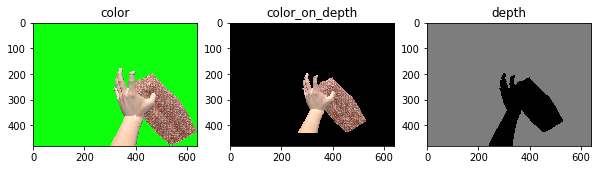

In [18]:
img_num = 94
plt.figure(figsize = [10,5])

for i, name in enumerate(arr):
    plt.subplot(1,3,i+1)
    fn = root_dir2 + str(img_num).zfill(8) + '_' + name + '.png'
    img = cv2.cvtColor(cv2.imread(fn), cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(name)
    
plt.show()

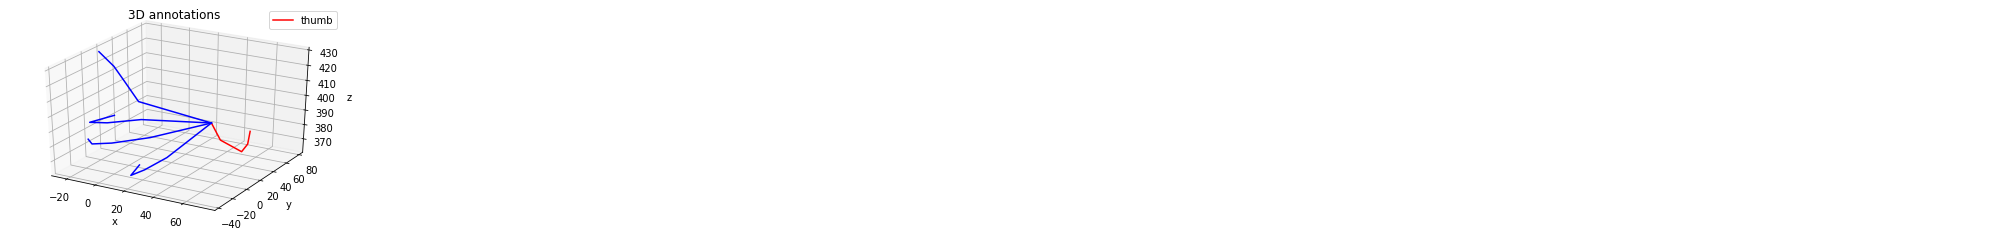

In [19]:
fn_anno_3d = root_dir2 + str(img_num).zfill(8) + '_joint_pos.txt'
anno_3d = np.loadtxt(fn_anno_3d, delimiter=',')
anno_3d = np.reshape(anno_3d, (21,3))

anno_3d_xs = anno_3d[:,0]
anno_3d_ys = anno_3d[:,1]
anno_3d_zs = anno_3d[:,2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.plot(anno_3d_xs[:5], anno_3d_ys[:5], anno_3d_zs[:5], 'r', label='thumb')
plt.plot(anno_3d_xs[[0,5,6,7,8]], anno_3d_ys[[0,5,6,7,8]], anno_3d_zs[[0,5,6,7,8]], 'b')
plt.plot(anno_3d_xs[[0,9,10,11,12]], anno_3d_ys[[0,9,10,11,12]], anno_3d_zs[[0,9,10,11,12]], 'b')
plt.plot(anno_3d_xs[[0,13,14,15,16]], anno_3d_ys[[0,13,14,15,16]], anno_3d_zs[[0,13,14,15,16]], 'b')
plt.plot(anno_3d_xs[[0,17,18,19,20]], anno_3d_ys[[0,17,18,19,20]], anno_3d_zs[[0,17,18,19,20]], 'b')

plt.title('3D annotations')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
#ax.view_init(290,100)
plt.show()

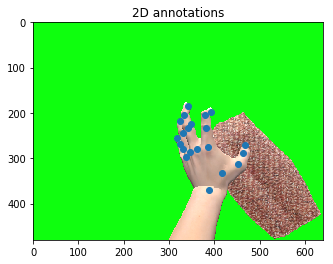

In [20]:
step1 = np.matmul(color_extrisics_matrix, np.hstack((anno_3d, np.ones((anno_3d.shape[0],1)))).T)
step2 = np.matmul(color_intrisics_matrix, step1)
anno_2d = step2.T
anno_2d = anno_2d[:,:2]/np.reshape(anno_2d[:,2], (anno_2d.shape[0],1))

anno_2d_xs = anno_2d[:,0]
anno_2d_ys = anno_2d[:,1]

fn = root_dir2 + str(img_num).zfill(8) + '_' + 'color' + '.png'
img = cv2.cvtColor(cv2.imread(fn), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.plot(anno_2d_xs, anno_2d_ys, 'o') 
plt.ylim(0,480)
plt.xlim(0,640)
plt.gca().invert_yaxis()
plt.title('2D annotations')
plt.show()

### GANerated Hands Dataset (Synthetic)

Link to download: https://handtracker.mpi-inf.mpg.de/projects/GANeratedHands/GANeratedDataset.htm

The dataset contains more than 330,000 color images of hands with 2D and 3D annotation for 21 keypoints of the hand. The images were initially synthetically generated and afterwards fed to a GAN for image-to-image translation to make the features more similar to real hands. 

- frames without object: 143,449
- frames with object: 188,050


- Color: resolution 256x256 px
- Ground Truth: 2D and 3D positions of all 21 hand keypoints

In [21]:
root_dir1 = data_dir + 'GANeratedHands_Release/data/noObject/0001/'
root_dir2 = data_dir + 'GANeratedHands_Release/data/withObject/0001/'

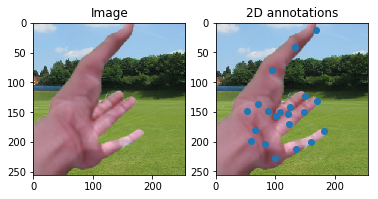

In [22]:
img_num = 3

plt.subplot(1,2,1)
fn = root_dir1 + str(img_num).zfill(4) + '_color_composed.png'
img = Image.open(fn)
plt.imshow(img)
plt.title('Image')

plt.subplot(1,2,2)
fn_anno_2d = root_dir1 + str(img_num).zfill(4) + '_joint2D.txt'
anno_2d = np.loadtxt(fn_anno_2d, delimiter=',')
anno_2d = np.reshape(anno_2d, (21,2))
anno_2d_xs = anno_2d[:,0]
anno_2d_ys = anno_2d[:,1]

plt.imshow(img)
plt.plot(anno_2d_xs, anno_2d_ys, 'o') 
plt.ylim(0,256)
plt.xlim(0,256)
plt.gca().invert_yaxis()
plt.title('2D annotations')


plt.show()

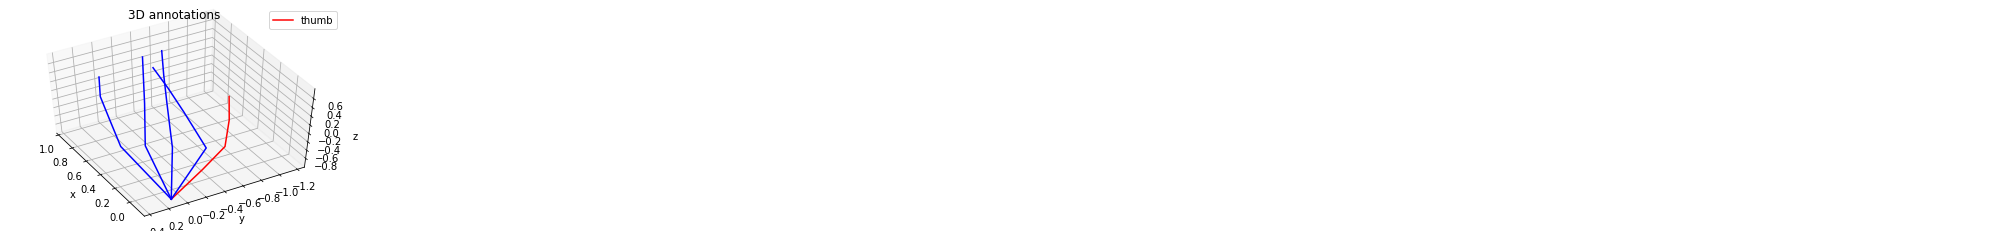

In [23]:
fn_anno_3d = root_dir1 + str(img_num).zfill(4) + '_joint_pos.txt'
anno_3d = np.loadtxt(fn_anno_3d, delimiter=',')
anno_3d = np.reshape(anno_3d, (21,3))

anno_3d_xs = anno_3d[:,0]
anno_3d_ys = anno_3d[:,1]
anno_3d_zs = anno_3d[:,2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.plot(anno_3d_xs[:5], anno_3d_ys[:5], anno_3d_zs[:5], 'r', label='thumb')
plt.plot(anno_3d_xs[[0,5,6,7,8]], anno_3d_ys[[0,5,6,7,8]], anno_3d_zs[[0,5,6,7,8]], 'b')
plt.plot(anno_3d_xs[[0,9,10,11,12]], anno_3d_ys[[0,9,10,11,12]], anno_3d_zs[[0,9,10,11,12]], 'b')
plt.plot(anno_3d_xs[[0,13,14,15,16]], anno_3d_ys[[0,13,14,15,16]], anno_3d_zs[[0,13,14,15,16]], 'b')
plt.plot(anno_3d_xs[[0,17,18,19,20]], anno_3d_ys[[0,17,18,19,20]], anno_3d_zs[[0,17,18,19,20]], 'b')

plt.title('3D annotations')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
ax.view_init(50,150)
plt.show()

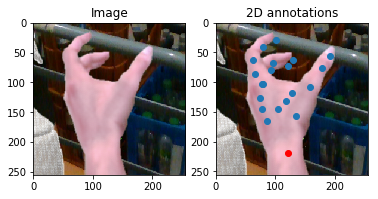

In [24]:
img_num = 5

plt.subplot(1,2,1)
fn = root_dir2 + str(img_num).zfill(4) + '_color_composed.png'
img = Image.open(fn)
plt.imshow(img)
plt.title('Image')

plt.subplot(1,2,2)
fn_anno_2d = root_dir2 + str(img_num).zfill(4) + '_joint2D.txt'
anno_2d = np.loadtxt(fn_anno_2d, delimiter=',')
anno_2d = np.reshape(anno_2d, (21,2))
anno_2d_xs = anno_2d[:,0]
anno_2d_ys = anno_2d[:,1]

plt.imshow(img)
plt.plot(anno_2d_xs[1:], anno_2d_ys[1:], 'o') 
plt.plot(anno_2d_xs[:1], anno_2d_ys[:1], 'or') 
plt.ylim(0,256)
plt.xlim(0,256)
plt.gca().invert_yaxis()
plt.title('2D annotations')

plt.show()

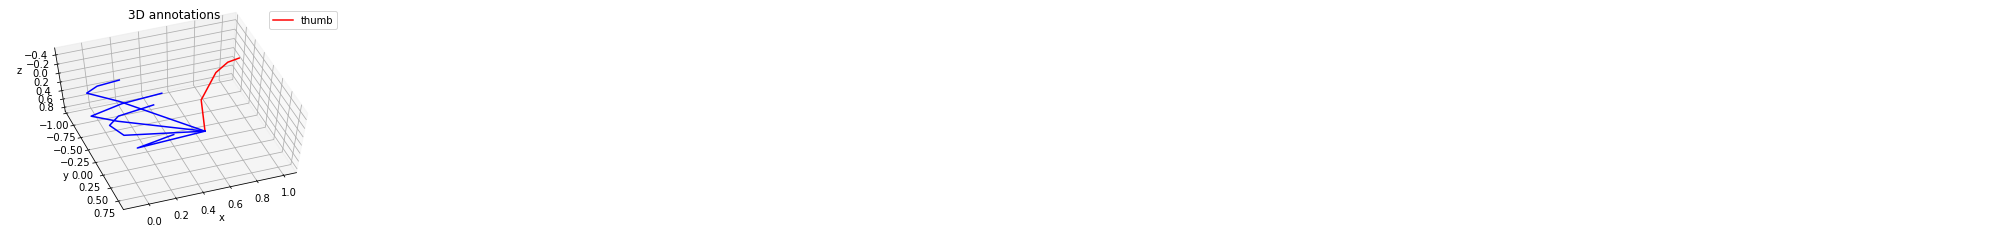

In [25]:
fn_anno_3d = root_dir2 + str(img_num).zfill(4) + '_joint_pos.txt'
anno_3d = np.loadtxt(fn_anno_3d, delimiter=',')
anno_3d = np.reshape(anno_3d, (21,3))

anno_3d_xs = anno_3d[:,0]
anno_3d_ys = anno_3d[:,1]
anno_3d_zs = anno_3d[:,2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.plot(anno_3d_xs[:5], anno_3d_ys[:5], anno_3d_zs[:5], 'r', label='thumb')
plt.plot(anno_3d_xs[[0,5,6,7,8]], anno_3d_ys[[0,5,6,7,8]], anno_3d_zs[[0,5,6,7,8]], 'b')
plt.plot(anno_3d_xs[[0,9,10,11,12]], anno_3d_ys[[0,9,10,11,12]], anno_3d_zs[[0,9,10,11,12]], 'b')
plt.plot(anno_3d_xs[[0,13,14,15,16]], anno_3d_ys[[0,13,14,15,16]], anno_3d_zs[[0,13,14,15,16]], 'b')
plt.plot(anno_3d_xs[[0,17,18,19,20]], anno_3d_ys[[0,17,18,19,20]], anno_3d_zs[[0,17,18,19,20]], 'b')

plt.title('3D annotations')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
ax.view_init(300,110)
plt.show()

### Dexter 1

Link to download: https://handtracker.mpi-inf.mpg.de/projects/handtracker_iccv2013/dexter1.htm

Dexter 1 consists of 7 sequences of challenging, slow and fast hand motions that covers the abduction-adduction and flexion-extension of the hand. Roughly the first 250 frames in each sequence correspond to slow motions while the remaining frames are fast motions. All sequences are with a single actor's right hand. Each frame was shot with 5 cameras.

- adbadd: 425 frames 
- fingercount: 393 frames 
- fingerwave: 535 frames
- flexex1: 517 frames
- pinch: 341 frames
- random: 509 frames
- tigergrasp: 442 frames 

2D annotations are for depth camera. Convertion to 2D for color images is in progress...

In [26]:
root_dir = data_dir + 'dexter1/data/'
folder_name = 'pinch/'

fn_anno_2d = root_dir + folder_name + 'annotations/Pos2D.txt'
df_anno_2d = pd.read_table(fn_anno_2d, sep = ',', header = None)

fn_anno_3d = root_dir + folder_name + 'annotations/Pos3D.txt'
df_anno_3d = pd.read_table(fn_anno_3d, sep = ',', header = None)

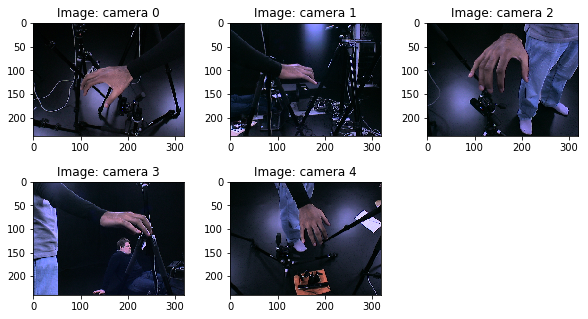

In [27]:
img_num = 51
img_code = '525438341940'
img_name = img_code + str(img_num).zfill(6) 

plt.figure(figsize=[10,5])
plt.subplots_adjust(hspace=0.4)

for n_cam in range(5):
    plt.subplot(2,3,n_cam+1)
    fn = root_dir + folder_name + 'multicam/cam' + str(n_cam) + \
    '/' + img_name + '_cam' + str(n_cam) + '.png'
    img = Image.open(fn)
    plt.imshow(img)
    plt.title('Image: camera ' + str(n_cam))

plt.show()

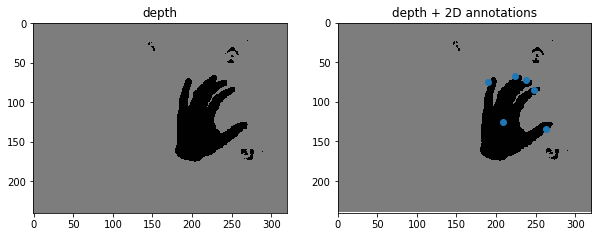

In [28]:
anno_2d = df_anno_2d.iloc[6*img_num:6*img_num+6]
anno_2d_xs = np.array(anno_2d[0])
anno_2d_ys = np.array(anno_2d[1])

fn_depth = root_dir + folder_name + 'tof/depth/' + img_code + '.png'

plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
img = cv2.cvtColor(cv2.imread(fn_depth), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('depth')

plt.subplot(1,2,2)
plt.imshow(img)
plt.plot(anno_2d_xs, anno_2d_ys, 'o') 
plt.ylim(0,240)
plt.xlim(0,320)
plt.title('depth + 2D annotations')
plt.gca().invert_yaxis()




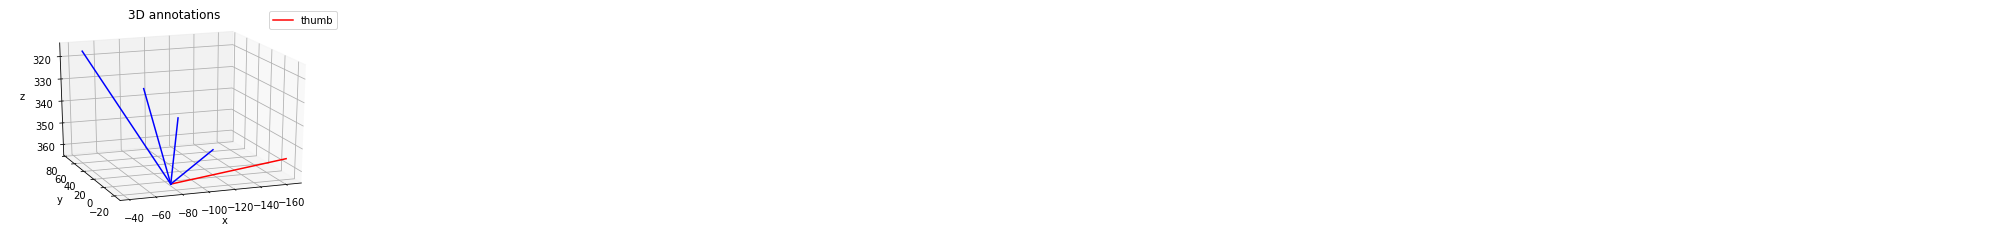

In [29]:
anno_3d = df_anno_3d.iloc[6*img_num:6*img_num+6]
anno_3d_xs = np.array(anno_3d[0])
anno_3d_ys = np.array(anno_3d[1])
anno_3d_zs = np.array(anno_3d[2])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.plot(anno_3d_xs[[5,0]], anno_3d_ys[[5,0]], anno_3d_zs[[5,0]], 'r', label='thumb')
plt.plot(anno_3d_xs[[5,1]], anno_3d_ys[[5,1]], anno_3d_zs[[5,1]], 'b')
plt.plot(anno_3d_xs[[5,2]], anno_3d_ys[[5,2]], anno_3d_zs[[5,2]], 'b')
plt.plot(anno_3d_xs[[5,3]], anno_3d_ys[[5,3]], anno_3d_zs[[5,3]], 'b')
plt.plot(anno_3d_xs[[5,4]], anno_3d_ys[[5,4]], anno_3d_zs[[5,4]], 'b')

plt.title('3D annotations')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
ax.view_init(200,110)
plt.show()

In [30]:
#import scipy.io
#mat = scipy.io.loadmat('dexter1/calibration/annotations/matrices.mat')

### EgoDexter 

Link to donwload: http://handtracker.mpi-inf.mpg.de/projects/OccludedHands/EgoDexter.htm

EgoDexter is an RGB-D dataset for evaluating algorithms for hand tracking in the presence of occlusions and clutter. It consists of 4 sequences with 4 actors (2 female), and varying interactions with various objects and cluttered background. Fingertip positions were manually annotated for 1485 out of 3190 frames. 

Data
- Color: Intel RealSense SR300 @640x480 px
- Depth: Intel RealSense SR300 @640x480 px
- Color on Depth: Constructed from the depth and color image using the Intel RealSense SDK
- Ground Truth: Manually annotated on depth data for 3D fingertip positions
- Camera Calibration: For mapping between world and camera coordinate systems (depth, color)

2D annotations are for color image are calculated from 3D annotations and camera calibration parameters.

In [22]:
root_dir = data_dir + 'EgoDexter/data/'
folder_name = 'Desk/'
arr = ['color','color_on_depth','depth']

In [23]:
data_dirs = os.listdir(root_dir)
data_dirs = np.sort([x for x in data_dirs if x != '.DS_Store'])

for dir in data_dirs:
    imgs = os.listdir(root_dir + dir + '/color/')
    imgs = [x for x in imgs if x != '.DS_Store']
    print(dir + ': ' + str(len(imgs)) + ' images')

Desk: 551 images
Fruits: 512 images
Kitchen: 570 images
Rotunda: 1557 images


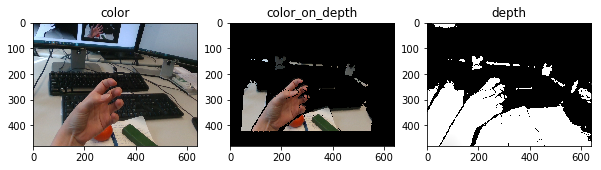

In [34]:
img_num = 20
plt.figure(figsize = [10,5])

for i, name in enumerate(arr):
    plt.subplot(1,3,i+1)
    fn = root_dir + folder_name + name + '/image_' + str(img_num).zfill(5) + \
                 '_' + name + '.png'
    img = Image.open(fn)
    plt.imshow(img)
    plt.title(name)
    
plt.show()

In [35]:
fn_anno_2d_depth = root_dir + folder_name + 'annotation.txt'
fn_anno_3d =root_dir + folder_name + 'annotation.txt_3D.txt'

df_anno_2d_depth = pd.read_table(fn_anno_2d_depth, sep=';', header=None)
df_anno_3d = pd.read_table(fn_anno_3d, sep=';', header=None)

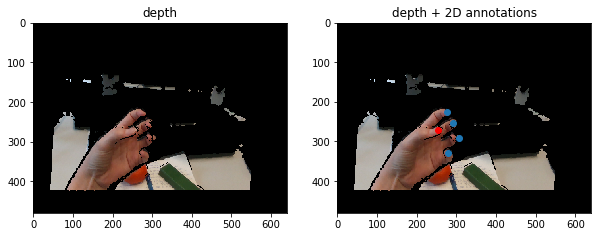

In [36]:
ls = list(df_anno_2d_depth.iloc[img_num])[:5]
ls = [x.split(', ') for x in ls]
xs = np.array([float(x[0].strip()) for x in ls])
ys = np.array([float(x[1].strip()) for x in ls])
anno_2d_depth = np.vstack((xs,ys))

plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
fn = root_dir + folder_name + 'color_on_depth' + '/image_' + str(img_num).zfill(5) + \
                 '_' + 'color_on_depth' + '.png'
img = Image.open(fn)
plt.imshow(img)
plt.title(name)

plt.subplot(1,2,2)
plt.imshow(img)
plt.plot(xs[1:], ys[1:], 'o') 
plt.plot(xs[:1], ys[:1], 'ro') 
plt.ylim(0,480)
plt.xlim(0,640)
plt.gca().invert_yaxis()
plt.title('depth + 2D annotations')

plt.show()

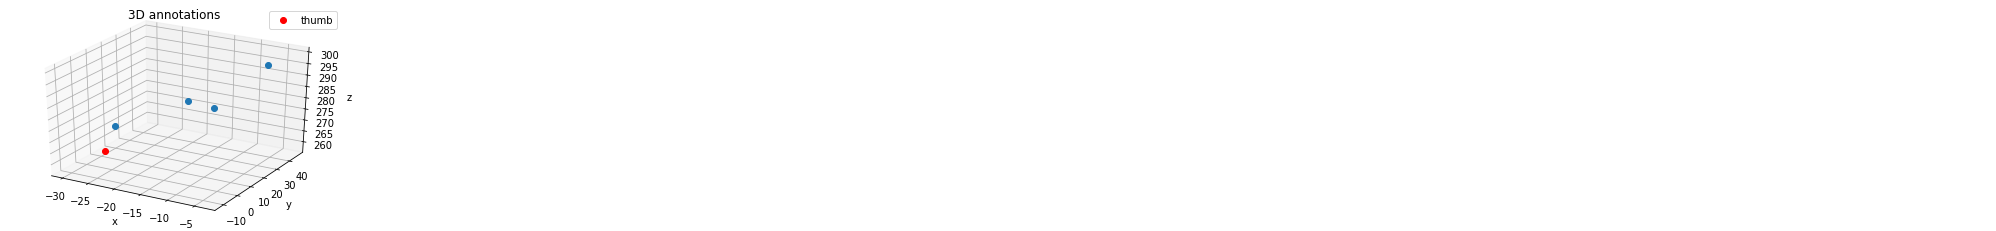

In [37]:
ls = list(df_anno_3d.iloc[img_num])[:5]
ls = [x.split(', ') for x in ls]
xs = np.array([float(x[0].strip()) for x in ls])
ys = np.array([float(x[1].strip()) for x in ls])
zs = np.array([float(x[2].strip()) for x in ls])
anno_3d = np.vstack((xs,ys,zs))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.plot(xs[:1], ys[:1], zs[:1], 'ro', label = 'thumb')
plt.plot(xs[1:], ys[1:], zs[1:], 'o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('3D annotations')
plt.legend()

plt.show()

In [38]:
# camera calibration parameters
depth_intrisics = np.array([[475.62, 0, 311.125],
                            [0, 475.62, 245.965],
                            [0, 0, 1]])

color_intrisics = np.array([[617.173, 0, 315.453],
                            [0, 617.173, 242.259],
                            [0, 0, 1]])

depth_extrisics = np.array([[1, 0, 0, 0],
                            [0, 1, 0, 0],
                            [0, 0, 1, 0]])

color_extrisics = np.array([[1.0000, 0.00090442, -0.0074, 20.2365],
                             [-0.00071933, 0.9997, 0.0248, 1.2846],
                             [0.0075, -0.0248, 0.9997, 5.7360]])

M_depth = np.matmul(depth_intrisics, depth_extrisics)
M_color = np.matmul(color_intrisics, color_extrisics)

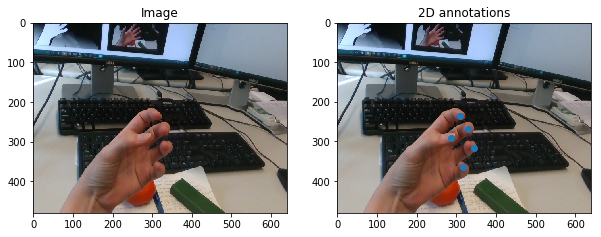

In [39]:
anno_3d_h = np.vstack((anno_3d, np.ones((1,anno_3d.shape[1]))))
anno_2d_h = np.matmul(M_color, anno_3d_h)
anno_2d = anno_2d_h[:2,:] / anno_2d_h[2,:]

plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
fn = root_dir + folder_name + 'color' + '/image_' + str(img_num).zfill(5) + \
                 '_' + 'color' + '.png'
img = cv2.cvtColor(cv2.imread(fn), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Image')

plt.subplot(1,2,2)
anno_2d_xs = anno_2d[0,:]
anno_2d_ys = anno_2d[1,:]
plt.imshow(img)
plt.plot(anno_2d_xs, anno_2d_ys, 'o') 
plt.ylim(0,480)
plt.xlim(0,640)
plt.gca().invert_yaxis()
plt.title('2D annotations')

plt.show()

###  Dexter + Object

Link to download: https://handtracker.mpi-inf.mpg.de/projects/RealtimeHO/dexter+object.htm

Consists of 6 sequences with 2 actors, and varying interactions with a simple object shape. Fingertip positions and cuboid corners were manually annotated for all sequences.

Data
- RGB: Creative Senz3D color camera
- Depth: Creative Senz3D close range TOF depth camera co-located with the color camera
- Ground Truth: Manually annotated on depth data for 3D fingertip positions, and 3 object (cuboid) corners
- Depth Camera Intrinsics: Can be used to backproject depth image to create a 3D point cloud

To get correct 2D annotations, I used provided calibration parameters with some changes.

In [39]:
root_dir = data_dir + 'dexter+object/data/'
data_dirs = os.listdir(root_dir)
data_dirs = np.sort([x for x in data_dirs if x != '.DS_Store'])

for dir in data_dirs:
    imgs = os.listdir(root_dir + dir + '/color/')
    imgs = [x for x in imgs if x != '.DS_Store']
    print(dir + ': ' + str(len(imgs)) + ' images')
    
folder_name = 'Grasp1'

Grasp1: 356 images
Grasp2: 648 images
Occlusion: 354 images
Pinch: 458 images
Rigid: 531 images
Rotate: 798 images


In [40]:
fn_anno_2d = root_dir + folder_name + '/annotations/' + folder_name + '2D.txt'
fn_anno_3d =root_dir + folder_name + '/annotations/' + folder_name + '3D.txt'

df_anno_2d = pd.read_table(fn_anno_2d, sep=';', header=None)
df_anno_3d = pd.read_table(fn_anno_3d, sep=';', header=None)

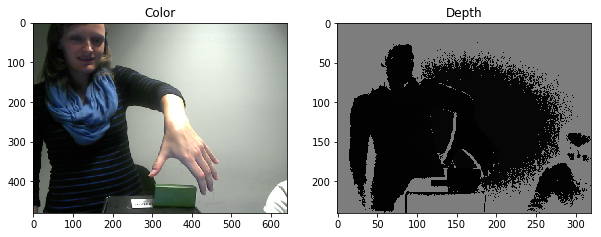

In [41]:
img_num = 50
plt.figure(figsize = [10,5])
arr = ['Color','Depth']

plt.subplot(1,2,1)
fn = root_dir + folder_name + '/color/Color_' + str(img_num).zfill(4) + '.bmp'
img = Image.open(fn)
plt.imshow(img)
plt.title('Color')

plt.subplot(1,2,2)
fn = root_dir + folder_name + '/depth/Depth_' + str(img_num).zfill(4) + '.png'
img = cv2.cvtColor(cv2.imread(fn), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Depth')
    
plt.show()

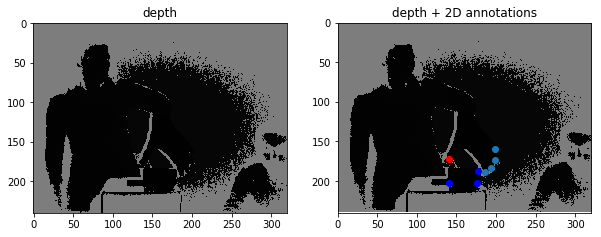

In [42]:
ls = list(df_anno_2d.iloc[img_num-1])[:8]
ls = [x.split(', ') for x in ls]
xs = [float(x[0].strip()) for x in ls]
ys = [float(x[1].strip()) for x in ls]
anno_2d_depth = np.hstack((np.reshape(xs, (len(xs),1)), np.reshape(ys, (len(xs),1)))).T

plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
fn = root_dir + folder_name + '/depth/Depth_' + str(img_num).zfill(4) + '.png'
img = cv2.cvtColor(cv2.imread(fn), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(name)

plt.subplot(1,2,2)
plt.imshow(img)
plt.plot(xs[1:5], ys[1:5], 'o') 
plt.plot(xs[:1], ys[:1], 'ro') 
plt.plot(xs[5:8], ys[5:8], 'bo') 
plt.ylim(0,240)
plt.xlim(0,320)
plt.gca().invert_yaxis()
plt.title('depth + 2D annotations')

plt.show()

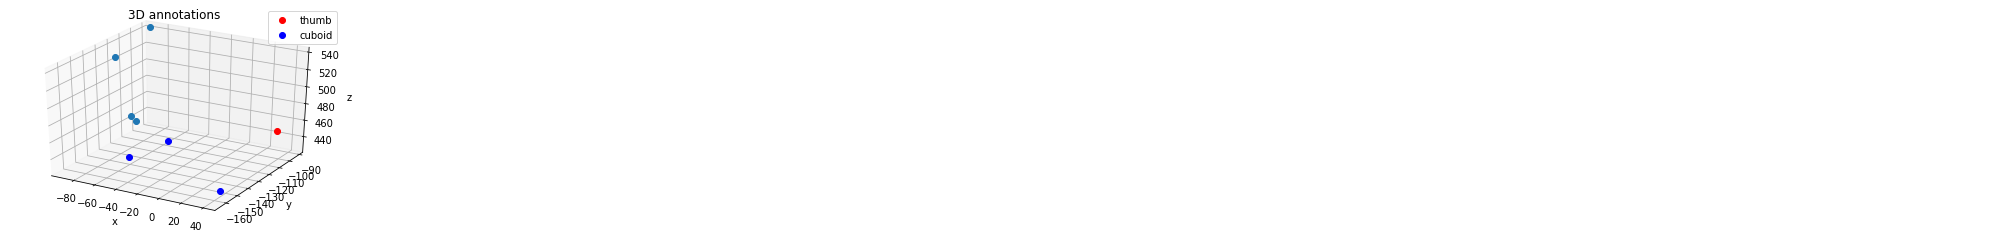

In [43]:
ls = list(df_anno_3d.iloc[img_num-1])[:8]
ls = [x.split(', ') for x in ls]
xs = [float(x[0].strip()) for x in ls]
ys = [float(x[1].strip()) for x in ls]
zs = [float(x[2].strip()) for x in ls]
anno_3d = np.hstack((np.reshape(xs, (len(xs),1)), np.reshape(ys, (len(xs),1)), 
                     np.reshape(zs, (len(xs),1)))).T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.plot(xs[:1], ys[:1], zs[:1], 'ro', label = 'thumb')
plt.plot(xs[1:5], ys[1:5], zs[1:5], 'o')
plt.plot(xs[5:8], ys[5:8], zs[5:8], 'bo', label = 'cuboid')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('3D annotations')
plt.legend()
plt.show()

In [44]:
# camera calibration parameters
depth_intrisics = np.array([[224.502, 0, 160],
                            [0, 230.494, 120],
                            [0, 0, 1]])

color_intrisics = np.array([[587.45209, 0, 325],
                            [0, 600.67456, 249],
                            [0, 0, 1]])

depth_extrisics = np.array([[1, 0, 0, 0],
                            [0, 1, 0, 0],
                            [0, 0, 1, 0]])

color_extrisics = np.array([[0.9999, 0.0034, 0.0161, 19.0473],
                             [-0.0033, 1.0000, -0.0079, -1.8514], 
                             [-0.0162, 0.0079, 0.9998, -4.7501]])

M_depth = np.matmul(depth_intrisics, depth_extrisics)
M_color = np.matmul(color_intrisics, color_extrisics)

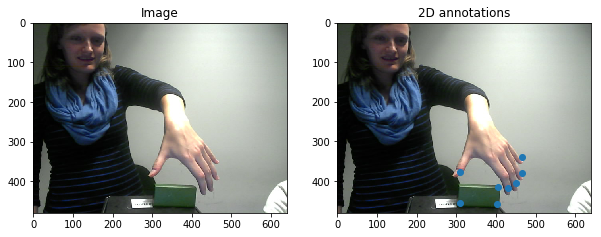

In [45]:
anno_3d_h = np.vstack((anno_3d, np.ones((1,anno_3d.shape[1]))))
anno_2d_h = np.matmul(M_color, anno_3d_h)
anno_2d = anno_2d_h[:2,:] / anno_2d_h[2,:]
# corrections that make it work
anno_2d[0,:] = 640 - anno_2d[0,:] + 80
anno_2d[1,:] = 480 - anno_2d[1,:]

plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
fn = root_dir + folder_name + '/color/Color_' + str(img_num).zfill(4) + '.bmp'
img = cv2.cvtColor(cv2.imread(fn), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Image')

plt.subplot(1,2,2)
anno_2d_xs = anno_2d[0,:] 
anno_2d_ys = anno_2d[1,:]
plt.imshow(img)
plt.plot(anno_2d_xs, anno_2d_ys, 'o') 
plt.ylim(0,480)
plt.xlim(0,640)
plt.gca().invert_yaxis()
plt.title('2D annotations')

plt.show()

###  Stereo Hand Pose

Link to download: https://sites.google.com/site/zhjw1988/

All the images are in folder '.\images\' which contains 12 subfolders. The left/right images for Point Grey Bumblebee2 stereo camera and color/depth images for Intel Real Sense F200 active depth camera have prefix BB_left_, BB_right_, SK_color_ and SK_depth_ respectively.

In [46]:
root_dir = data_dir + 'stereohandtracking/'
for folder in np.sort(os.listdir(root_dir + 'images/')):
    data_folder = root_dir + 'images/' + folder
    print('{}: {} images'.format(folder, len(os.listdir(data_folder))))

B1Counting: 6000 images
B1Random: 6000 images
B2Counting: 6000 images
B2Random: 6000 images
B3Counting: 6000 images
B3Random: 6000 images
B4Counting: 6000 images
B4Random: 6000 images
B5Counting: 6000 images
B5Random: 6000 images
B6Counting: 6000 images
B6Random: 6000 images


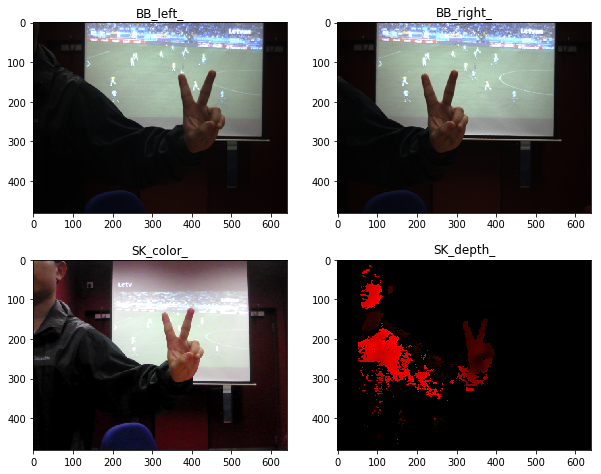

In [51]:
cameras = ['BB_left_', 'BB_right_', 'SK_color_', 'SK_depth_']
folder = 'B5Random'
path = root_dir + 'images/' + folder + '/'
img_num = 500

plt.figure(figsize=[10,8])
for i, camera in enumerate(cameras,1):
    plt.subplot(2,2,i)
    img_name = path + camera + str(img_num) + '.png'
    img = Image.open(img_name)
    plt.title(camera)
    plt.imshow(img)

In [52]:
# annotations 3d
fn_labels = root_dir + 'labels/' + folder + '_SK.mat'
anno_3d = loadmat(fn_labels)['handPara']

r_vec = -np.array([[0.00531, -0.01196, 0.00301]])
t_vec = -np.array([-24.0381, -0.4563, -1.2326])
r_mat, _ = cv2.Rodrigues(r_vec)
transform_matrix = np.hstack([r_mat, t_vec.reshape((3, 1))])

intrinsic = np.array([
            [607.92271, 0, 314.78337],
            [0, 607.88192, 236.42484],
            [0, 0, 1]
        ])

In [53]:
anno_3d_tr = anno_3d[..., img_num].T
anno_3d_tr = np.hstack([anno_3d_tr, np.ones((21, 1))])
anno_3d_tr = (transform_matrix @ anno_3d_tr.T).T

anno_2d = (intrinsic @ anno_3d_tr.T).T
anno_2d = anno_2d[:, :2] / anno_2d[:, 2:]

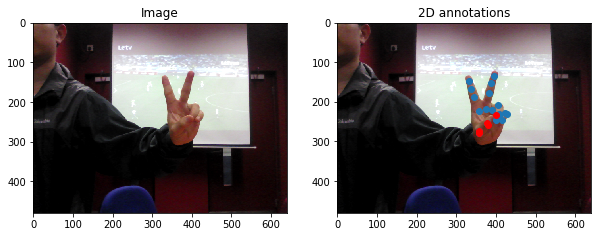

In [56]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)

img_name = path + 'SK_color_' + str(img_num) + '.png'
img = Image.open(img_name)
plt.imshow(img)
plt.title('Image')

plt.subplot(1,2,2)
anno_2d_xs = anno_2d[:,0]
anno_2d_ys = anno_2d[:,1]
plt.imshow(img)
plt.plot(anno_2d_xs[1:], anno_2d_ys[1:], 'o') 
plt.plot(anno_2d_xs[[0,17,18,19,20]], anno_2d_ys[[0,17,18,19,20]], 'or', label='thumb')
plt.ylim(0,480)
plt.xlim(0,640)
plt.gca().invert_yaxis()
plt.title('2D annotations')

plt.show()

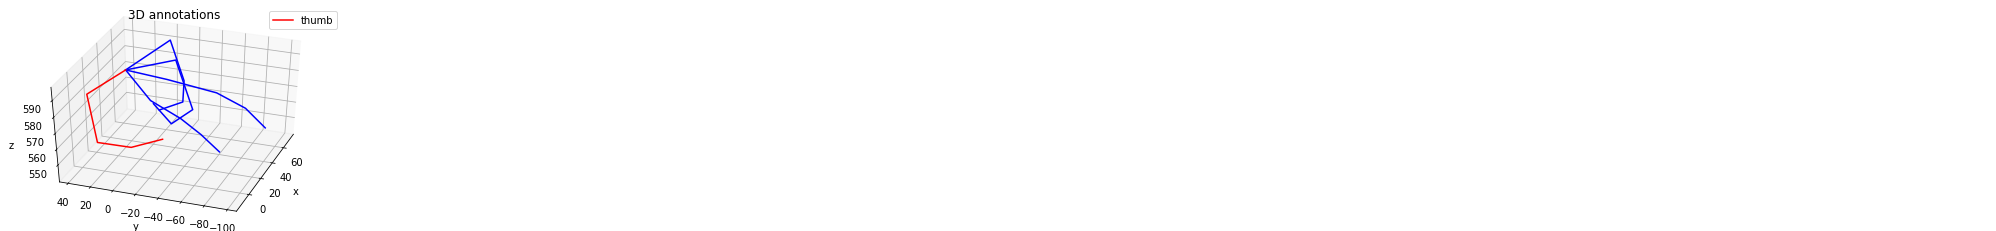

In [57]:
anno_3d_xs = anno_3d[0,:,img_num]
anno_3d_ys = anno_3d[1,:,img_num]
anno_3d_zs = anno_3d[2,:,img_num]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.plot(anno_3d_xs[:5], anno_3d_ys[:5], anno_3d_zs[:5], 'b')
plt.plot(anno_3d_xs[[0,5,6,7,8]], anno_3d_ys[[0,5,6,7,8]], anno_3d_zs[[0,5,6,7,8]], 'b')
plt.plot(anno_3d_xs[[0,9,10,11,12]], anno_3d_ys[[0,9,10,11,12]], anno_3d_zs[[0,9,10,11,12]], 'b')
plt.plot(anno_3d_xs[[0,13,14,15,16]], anno_3d_ys[[0,13,14,15,16]], anno_3d_zs[[0,13,14,15,16]], 'b')
plt.plot(anno_3d_xs[[0,17,18,19,20]], anno_3d_ys[[0,17,18,19,20]], anno_3d_zs[[0,17,18,19,20]], 
         'r', label='thumb')

plt.title('3D annotations')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
ax.view_init(40,200)
plt.show()